In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import datetime
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
# File to Load (Remember to Change These)
file_to_load_11 = "project_4_data_2_us.csv"

# Read File and store into Pandas data frame
sv8sv9_analysis = pd.read_csv(file_to_load_11, infer_datetime_format=True)


In [3]:
sv8sv9_analysis = sv8sv9_analysis.drop(['Unnamed: 0', 'Cost%'], axis=1)
sv8sv9_analysis

KeyError: "['Cost%'] not found in axis"

In [81]:
#Get Order Dates

sv8sv9_analysis['Order Date'] = pd.to_datetime(sv8sv9_analysis['Order Date'], errors='coerce')



# #Change the data in thr YEAR_ column to a float.
# sv8sv9_analysis["Order Date"] = sv8sv9_analysis["Order Date"].apply(pd.to_numeric, downcast='float', errors='coerce')

sv8sv9_analysis['Order_YMD'] = pd.to_datetime(sv8sv9_analysis['Order Date'], infer_datetime_format=True, utc=None)
pd.to_datetime(sv8sv9_analysis['Order Date'], format="%m/%d/%y", utc=None)

sv8sv9_analysis['Order Day'] = sv8sv9_analysis['Order Date'].dt.day
sv8sv9_analysis['Order Month'] = sv8sv9_analysis['Order Date'].dt.month
sv8sv9_analysis['Order Year'] = sv8sv9_analysis['Order Date'].dt.year

In [127]:
sv8sv9_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              18393 non-null  object        
 1   Order Date            18393 non-null  datetime64[ns]
 2   Ship Date             18393 non-null  object        
 3   Order Quantity        18393 non-null  int64         
 4   Unit Price            18393 non-null  float64       
 5   Discount              18393 non-null  float64       
 6   Sales                 18393 non-null  float64       
 7   Profit                18393 non-null  float64       
 8   Product Category      18393 non-null  object        
 9   Product Sub-Category  18393 non-null  object        
 10  Product Name          18393 non-null  object        
 11  Customer Segment      18393 non-null  object        
 12  Customer Name         18393 non-null  object        
 13  Country         

In [82]:
#Returns
#How much is lost is returns?


In [83]:
#Do a GroupBy for Average Returns with 0 = Not Returned and 1 = Returned
sv8sv9_analysis_returns_means = sv8sv9_analysis.groupby('Returned').mean()
sv8sv9_analysis_returns_means = sv8sv9_analysis_returns_means[['Order Quantity', 'Unit Price', 'Sales', 'Profit', 'Cost', 'GM%']]
sv8sv9_analysis_returns_means

#NOTES: The Average Return on a single transaction is $1,097.71

,Order Quantity,Unit Price,Sales,Profit,Cost,GM%
Returned,,,,,,
0,13.547994,82.203543,919.648566,94.880673,824.767893,0.005476
1,15.618421,78.439964,1097.702156,132.574917,965.127239,-0.003228


In [84]:
#Do a GroupBy for Total Returns with 0 = Not Returned and 1 = Returned
sv8sv9_analysis_returns_sum = sv8sv9_analysis.groupby('Returned').sum()
sv8sv9_analysis_returns_sum = sv8sv9_analysis_returns_sum[['Order Quantity', 'Unit Price', 'Sales', 'Profit', 'Cost', 'GM%']]

sv8sv9_analysis_returns_sum

,Order Quantity,Unit Price,Sales,Profit,Cost,GM%
Returned,,,,,,
0,226536,1374525.45,1.537744e+07,1.586500e+06,1.379094e+07,91.570796
1,26114,131151.62,1.835358e+06,2.216653e+05,1.613693e+06,-5.397657


In [85]:
sv8sv9_analysis_returned = sv8sv9_analysis.loc[sv8sv9_analysis['Returned'] == 1]

In [87]:
sv8sv9_analysis_returned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672 entries, 9 to 18391
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              1672 non-null   object        
 1   Order Date            1672 non-null   datetime64[ns]
 2   Ship Date             1672 non-null   object        
 3   Order Quantity        1672 non-null   int64         
 4   Unit Price            1672 non-null   float64       
 5   Discount              1672 non-null   float64       
 6   Sales                 1672 non-null   float64       
 7   Profit                1672 non-null   float64       
 8   Product Category      1672 non-null   object        
 9   Product Sub-Category  1672 non-null   object        
 10  Product Name          1672 non-null   object        
 11  Customer Segment      1672 non-null   object        
 12  Customer Name         1672 non-null   object        
 13  Country          

In [95]:
sv8sv9_analysis_returned_year = sv8sv9_analysis_returned.groupby('Order Year').sum()
sv8sv9_analysis_returned_year = sv8sv9_analysis_returned_year[['Order Quantity', 'Sales', 'Profit', 'Cost', 'GM%', 'Returned']]
sv8sv9_analysis_returned_year

,Order Quantity,Sales,Profit,Cost,GM%,Returned
Order Year,,,,,,
2009,5933,499662.1795,72813.2100,426848.9695,-35.825265,224
2010,5946,428207.6900,40506.5900,387701.1000,-30.014087,233
2011,6117,311782.8290,13562.1671,298220.6619,-24.378566,359
2012,6188,484081.4710,76443.6400,407637.8310,9.824378,370
2013,790,36121.7720,2612.3857,33509.3863,24.994603,197
2014,1140,75502.0639,15727.2687,59774.7952,50.001279,289


In [98]:
#Dates
#How many orders per year?
sv8sv9_order_by_year = sv8sv9_analysis.groupby('Order Year').sum()
sv8sv9_order_by_year = sv8sv9_order_by_year[['Order Quantity', 'Sales', 'Profit', 'Cost', 'GM%', 'Returned']]
sv8sv9_order_by_year

,Order Quantity,Sales,Profit,Cost,GM%,Returned
Order Year,,,,,,
2009,54380,4.209139e+06,434538.7300,3.774601e+06,-312.861801,224
2010,54384,3.549681e+06,363871.4800,3.185809e+06,-266.088021,233
2011,59145,3.921064e+06,430999.9641,3.490064e+06,-30.712519,359
2012,62428,4.190496e+06,403520.3837,3.786976e+06,-24.059694,370
2013,9810,6.084738e+05,81726.9308,5.267469e+05,334.352668,197
2014,12503,7.339470e+05,93507.5131,6.404395e+05,385.542506,289


In [162]:
sv8sv9_order_by_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2009 to 2014
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Quantity Total  6 non-null      int64  
 1   Sales Total           6 non-null      float64
 2   Profit Total          6 non-null      float64
 3   Cost Total            6 non-null      float64
 4   GM% Total             6 non-null      float64
 5   Returned              6 non-null      int64  
dtypes: float64(4), int64(2)
memory usage: 336.0 bytes


In [99]:
#Change column names.
sv8sv9_analysis_returned_year = sv8sv9_analysis_returned_year.rename(columns={"Order Quantity":"Order Quantity Returned"})
sv8sv9_analysis_returned_year = sv8sv9_analysis_returned_year.rename(columns={"Sales":"Sales Returned"})
sv8sv9_analysis_returned_year = sv8sv9_analysis_returned_year.rename(columns={"Profit":"Profit Returned"})
sv8sv9_analysis_returned_year = sv8sv9_analysis_returned_year.rename(columns={"Cost":"Cost Returned"})
sv8sv9_analysis_returned_year = sv8sv9_analysis_returned_year.rename(columns={"GM%":"GM% Returned"})
sv8sv9_order_by_year = sv8sv9_order_by_year.rename(columns={"Order Quantity":"Order Quantity Total"})
sv8sv9_order_by_year = sv8sv9_order_by_year.rename(columns={"Sales":"Sales Total"})
sv8sv9_order_by_year = sv8sv9_order_by_year.rename(columns={"Profit":"Profit Total"})
sv8sv9_order_by_year = sv8sv9_order_by_year.rename(columns={"Cost":"Cost Total"})
sv8sv9_order_by_year = sv8sv9_order_by_year.rename(columns={"GM%":"GM% Total"})

In [100]:
#Merge the returns per year and total per year dataframes.
sv8sv9_returned_year_merge = sv8sv9_analysis_returned_year.merge(sv8sv9_order_by_year, how='inner', on='Order Year')
sv8sv9_returned_year_merge

,Order Quantity Returned,Sales Returned,Profit Returned,Cost Returned,GM% Returned,Returned_x,Order Quantity Total,Sales Total,Profit Total,Cost Total,GM% Total,Returned_y
Order Year,,,,,,,,,,,,
2009,5933,499662.1795,72813.2100,426848.9695,-35.825265,224,54380,4.209139e+06,434538.7300,3.774601e+06,-312.861801,224
2010,5946,428207.6900,40506.5900,387701.1000,-30.014087,233,54384,3.549681e+06,363871.4800,3.185809e+06,-266.088021,233
2011,6117,311782.8290,13562.1671,298220.6619,-24.378566,359,59145,3.921064e+06,430999.9641,3.490064e+06,-30.712519,359
2012,6188,484081.4710,76443.6400,407637.8310,9.824378,370,62428,4.190496e+06,403520.3837,3.786976e+06,-24.059694,370
2013,790,36121.7720,2612.3857,33509.3863,24.994603,197,9810,6.084738e+05,81726.9308,5.267469e+05,334.352668,197
2014,1140,75502.0639,15727.2687,59774.7952,50.001279,289,12503,7.339470e+05,93507.5131,6.404395e+05,385.542506,289


In [101]:
sv8sv9_returned_year_merge['% of Order Quantity'] = sv8sv9_returned_year_merge['Order Quantity Returned']/sv8sv9_returned_year_merge['Order Quantity Total']
sv8sv9_returned_year_merge['% of Sales'] = sv8sv9_returned_year_merge['Sales Returned']/sv8sv9_returned_year_merge['Sales Total']
sv8sv9_returned_year_merge['% of Profit'] = sv8sv9_returned_year_merge['Profit Returned']/sv8sv9_returned_year_merge['Profit Total']
sv8sv9_returned_year_merge['% of Cost'] = sv8sv9_returned_year_merge['Cost Returned']/sv8sv9_returned_year_merge['Cost Total']
sv8sv9_returned_year_merge['% of GM%'] = sv8sv9_returned_year_merge['GM% Returned']/sv8sv9_returned_year_merge['GM% Total']

In [102]:
sv8sv9_returned_year_merge
#Note: About 8.1-10.9% of the orders are being returned per year.

,Order Quantity Returned,Sales Returned,Profit Returned,Cost Returned,GM% Returned,Returned_x,Order Quantity Total,Sales Total,Profit Total,Cost Total,GM% Total,Returned_y,% of Order Quantity,% of Sales,% of Profit,% of Cost,% of GM%
Order Year,,,,,,,,,,,,,,,,,
2009,5933,499662.1795,72813.2100,426848.9695,-35.825265,224,54380,4.209139e+06,434538.7300,3.774601e+06,-312.861801,224,0.109103,0.118709,0.167564,0.113085,0.114508
2010,5946,428207.6900,40506.5900,387701.1000,-30.014087,233,54384,3.549681e+06,363871.4800,3.185809e+06,-266.088021,233,0.109334,0.120633,0.111321,0.121696,0.112798
2011,6117,311782.8290,13562.1671,298220.6619,-24.378566,359,59145,3.921064e+06,430999.9641,3.490064e+06,-30.712519,359,0.103424,0.079515,0.031467,0.085448,0.793766
2012,6188,484081.4710,76443.6400,407637.8310,9.824378,370,62428,4.190496e+06,403520.3837,3.786976e+06,-24.059694,370,0.099122,0.115519,0.189442,0.107642,-0.408333
2013,790,36121.7720,2612.3857,33509.3863,24.994603,197,9810,6.084738e+05,81726.9308,5.267469e+05,334.352668,197,0.080530,0.059365,0.031965,0.063616,0.074755
2014,1140,75502.0639,15727.2687,59774.7952,50.001279,289,12503,7.339470e+05,93507.5131,6.404395e+05,385.542506,289,0.091178,0.102871,0.168193,0.093334,0.129691


NameError: name 'ylabel' is not defined

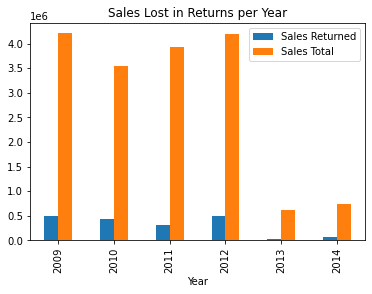

In [172]:
#create a bar graph for sales lost in returns per year.

sv8sv9_returned_year_merge.reset_index().plot(
x="Order Year", y=["Sales Returned", "Sales Total"], kind="bar"
)
plt.title("Sales Lost in Returns per Year vs. Sales Total")
plt.xlabel("Year")
plt-ylabel("Percent Lost in Returns")

NameError: name 'ylabel' is not defined

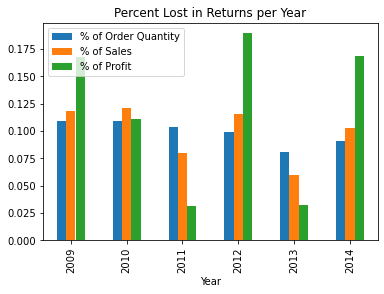

In [171]:
#Create a bar graph of percent lost in returns per year.

sv8sv9_returned_year_merge.reset_index().plot(
x="Order Year", y=["% of Order Quantity", "% of Sales", "% of Profit"], kind="bar"
)
plt.title("Percent Lost in Returns per Year")
plt.xlabel("Year")
plt-ylabel("Percent Lost in Returns")

In [153]:
#Prep for bar graph

sv8sv9_analysis_returned.dropna()
sv8sv9_analysis_returned_bar = sv8sv9_analysis_returned[['Order Year', 'Product Category']]
sv8sv9_analysis_returned_bar = pd.get_dummies(sv8sv9_analysis_returned_bar, dummy_na=True)


sv8sv9_analysis_returned_bar = sv8sv9_analysis_returned_bar.rename(columns={"Product Category_Furniture":"Furniture"})
sv8sv9_analysis_returned_bar = sv8sv9_analysis_returned_bar.rename(columns={"Product Category_Office Supplies":"Office Supplies"})
sv8sv9_analysis_returned_bar = sv8sv9_analysis_returned_bar.rename(columns={"Product Category_Technology":"Technology"})
sv8sv9_analysis_returned_bar = sv8sv9_analysis_returned_bar.rename(columns={"Product Category_nan":"NaN"})

sv8sv9_analysis_returned_bar_gb = sv8sv9_analysis_returned_bar.groupby('Order Year').sum()
sv8sv9_analysis_returned_bar_gb

,Furniture,Office Supplies,Technology,NaN
Order Year,,,,
2009,54,113,57,0
2010,49,123,61,0
2011,68,206,85,0
2012,87,200,83,0
2013,36,126,35,0
2014,70,166,53,0


NameError: name 'ylabel' is not defined

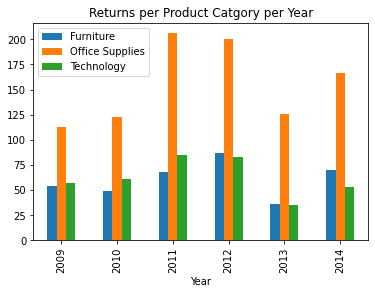

In [158]:
#Create a bar graph.

sv8sv9_analysis_returned_bar_gb.reset_index().plot(
x="Order Year", y=["Furniture", "Office Supplies", "Technology"], kind="bar"
)
plt.title("Returns per Product Catgory per Year")
plt.xlabel("Year")
plt-ylabel("Number of Returns")

In [ ]:
#What items are being returned?

In [104]:
#Do a groupby to determine the number of orders returned per category.
sv8sv9_analysis_returned_items = sv8sv9_analysis_returned.groupby('Product Category').count()
sv8sv9_analysis_returned_items

,Order ID,Order Date,Ship Date,Order Quantity,Unit Price,Discount,Sales,Profit,Product Sub-Category,Product Name,...,City (US),State (US),Postal Code (US),Returned,GM%,Cost,Order_YMD,Order Day,Order Month,Order Year
Product Category,,,,,,,,,,,,,,,,,,,,,
Furniture,364,364,364,364,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
Office Supplies,934,934,934,934,934,934,934,934,934,934,...,934,934,934,934,934,934,934,934,934,934
Technology,374,374,374,374,374,374,374,374,374,374,...,374,374,374,374,374,374,374,374,374,374


<AxesSubplot:title={'center':'Returns per Product Category'}, ylabel='Order ID'>

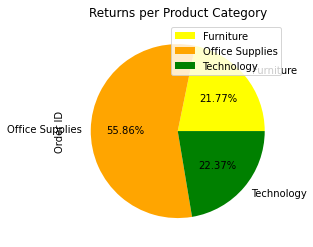

In [116]:
sv8sv9_analysis_returned.groupby('Product Category').count().plot(kind='pie', y='Order ID', autopct='%0.2f%%',
                                colors = ['yellow', 'orange', 'green'],
                                title='Returns per Product Category')

In [135]:
#What are the most frequently returned items?
sv8sv9_analysis_returned_name = sv8sv9_analysis_returned.groupby(['Product Name', 'Product Category', 'Unit Price']).count()
sv8sv9_analysis_returned_name.sort_values(by='Order ID', ascending=False)['Order ID'].head(20)

Product Name                                                                  Product Category  Unit Price
Imation Neon Mac Format Diskettes, 10/Pack                                    Technology        8.12          5
Bush Mission Pointe Library                                                   Furniture         150.98        5
Vinyl Sectional Post Binders                                                  Office Supplies   37.70         5
Riverside Furniture Stanwyck Manor Table Series                               Furniture         286.85        5
O'Sullivan Elevations Bookcase, Cherry Finish                                 Furniture         130.98        5
Xerox 1897                                                                    Office Supplies   4.98          4
Hon 61000 Series Interactive Training Tables                                  Furniture         44.43         4
Xerox 1940                                                                    Office Supplies   54.96        

In [169]:
#What are the most expensive returned items?
sv8sv9_analysis_returned_name = sv8sv9_analysis_returned.groupby(['Product Name', 'Product Category', 'Unit Price', 'Order Year']).count()
sv8sv9_analysis_returned_name.sort_values(by='Unit Price', ascending=False)['Order ID'].head(20)

Product Name                                                                 Product Category  Unit Price  Order Year
Polycom ViewStation™ ISDN Videoconferencing Unit                             Technology        6783.02     2011          1
Canon imageCLASS 2200 Advanced Copier                                        Technology        3499.99     2014          1
Polycom ViewStation™ Adapter H323 Videoconferencing Unit                     Technology        1938.02     2012          1
GBC DocuBind P400 Electric Binding System                                    Office Supplies   1360.99     2011          1
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind  Office Supplies   1270.99     2009          1
GBC DocuBind TL300 Electric Binding System                                   Office Supplies   896.99      2009          1
                                                                                                           2011          1
Riverside Palais Roya

In [120]:
#What percent of each category are being returned.
sv8sv9_order_by_year2 = sv8sv9_analysis.groupby('Order Year').sum()
sv8sv9_order_by_year2

,Order Quantity,Unit Price,Discount,Sales,Profit,Postal Code (US),Returned,GM%,Cost,Order Day,Order Month
Order Year,,,,,,,,,,,
2009,54380,232773.63,105.18,4.209139e+06,434538.7300,0,224,-312.861801,3.774601e+06,32873,13790
2010,54384,162273.98,105.78,3.549681e+06,363871.4800,0,233,-266.088021,3.185809e+06,34497,14347
2011,59145,317418.70,417.20,3.921064e+06,430999.9641,113271247,359,-30.712519,3.490064e+06,61627,28821
2012,62428,348891.44,431.58,4.190496e+06,403520.3837,111208247,370,-24.059694,3.786976e+06,65976,30184
2013,9810,196536.06,399.12,6.084738e+05,81726.9308,140529941,197,334.352668,5.267469e+05,40369,20032
2014,12503,247783.26,519.42,7.339470e+05,93507.5131,186563217,289,385.542506,6.404395e+05,51459,25703


In [185]:
#Are certain people returning items?
sv8sv9_analysis_returned_person = sv8sv9_analysis_returned.groupby('Customer Name').count()
sv8sv9_analysis_returned_person
sv8sv9_analysis_returned_person.sort_values(by='Order ID', ascending=False)['Order ID'].head(20)

Customer Name
Darren Budd         16
Seth Vernon         14
Ted Butterfield     13
Dave Hallsten       12
Carlos Soltero      11
Anthony Johnson     11
William Brown       11
Dan Reichenbach     11
Joe Elijah          10
Sandra Glassco      10
Dianna Vittorini    10
Clay Ludtke         10
Erin Creighton      10
Natalie Webber      10
Stefania Perrino    10
Greg Guthrie        10
Lena Creighton       9
Rick Wilson          9
Brosina Hoffman      9
Bruce Stewart        9
Name: Order ID, dtype: int64

In [187]:
#Sales : Cost Ratio

sv8sv9_order_by_year

,Order Quantity Total,Sales Total,Profit Total,Cost Total,GM% Total,Returned
Order Year,,,,,,
2009,54380,4.209139e+06,434538.7300,3.774601e+06,-312.861801,224
2010,54384,3.549681e+06,363871.4800,3.185809e+06,-266.088021,233
2011,59145,3.921064e+06,430999.9641,3.490064e+06,-30.712519,359
2012,62428,4.190496e+06,403520.3837,3.786976e+06,-24.059694,370
2013,9810,6.084738e+05,81726.9308,5.267469e+05,334.352668,197
2014,12503,7.339470e+05,93507.5131,6.404395e+05,385.542506,289


NameError: name 'ylabel' is not defined

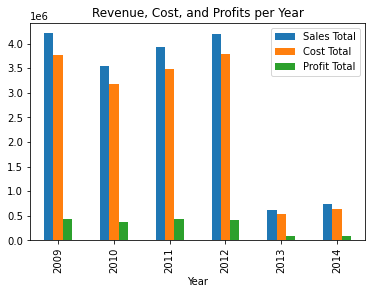

In [188]:
#Create a bar graph.

sv8sv9_order_by_year.reset_index().plot(
x="Order Year", y=["Sales Total", "Cost Total", "Profit Total"], kind="bar"
)
plt.title("Revenue, Cost, and Profits per Year")
plt.xlabel("Year")
plt-ylabel("Dollars")

In [69]:
#Dates
#How many returns per year?
sv8sv9_analysis_by_year = sv8sv9_analysis.groupby('Order Year').sum()
sv8sv9_analysis_by_year[['Order Quantity', 'Sales', 'Profit', 'Returned']]


,Order Quantity,Sales,Profit,Returned
Order Year,,,,
2009,54380,4.209139e+06,434538.7300,224
2010,54384,3.549681e+06,363871.4800,233
2011,59145,3.921064e+06,430999.9641,359
2012,62428,4.190496e+06,403520.3837,370
2013,9810,6.084738e+05,81726.9308,197
2014,12503,7.339470e+05,93507.5131,289
